In [1]:
import pandas as pd

In [2]:
import re

In [3]:
df = pd.read_json("filmy.json")

In [4]:
def premiera(x, jaka):
    try:
        if f"{jaka}premiéra" in x:
            x = x.split(f"{jaka}premiéra")[1]
            try:
                datum = re.search('.*?\d{4}', x).group().replace(f"{jaka}premiéra","").strip()
                # datum = pd.to_datetime(datum, errors="coerce", format = "%d. %m. %Y")
            except:
                datum = ""
            try:
                misto = re.search('\((.*?)\)', x).group().replace("(","").replace(")","").strip()
            except AttributeError:
                misto = ""
        else:
            datum = ""
            misto = ""
    except TypeError:
        datum = ""
        misto = ""
    return [datum, misto]

In [5]:
df["Slavnostní premiéra (datum)"] = df["Premiéra"].apply(lambda x: premiera(x, "slavnostní ")[0])
df["Slavnostní premiéra (místo)"] = df["Premiéra"].apply(lambda x: premiera(x, "slavnostní ")[1])
df["Distribuční premiéra (datum)"] = df["Premiéra"].apply(lambda x: premiera(x, "distribuční ")[0])
df["Distribuční premiéra (místo)"] = df["Premiéra"].apply(lambda x: premiera(x, "distribuční ")[1])
df["Festivalová premiéra (datum)"] = df["Premiéra"].apply(lambda x: premiera(x, "festivalová ")[0])
df["Festivalová premiéra (místo)"] = df["Premiéra"].apply(lambda x: premiera(x, "festivalová ")[1])
df["Zahraniční premiéra (datum)"] = df["Premiéra"].apply(lambda x: premiera(x, "zahraniční ")[0])
df["Zahraniční premiéra (místo)"] = df["Premiéra"].apply(lambda x: premiera(x, "zahraniční ")[1])
df["Premiéra bez upřesnění (datum)"] = df["Premiéra"].apply(lambda x: premiera(x, "")[0])

In [6]:
df["Premiéra bez upřesnění (datum)"]

0       19. 6. 1898
1       24. 7. 1898
2         léto 1898
3       19. 6. 1898
4       24. 7. 1898
           ...     
4520     2. 2. 2022
4521    20. 4. 2022
4522     5. 4. 2022
4523     2. 8. 2022
4524     2. 3. 2022
Name: Premiéra bez upřesnění (datum), Length: 4525, dtype: object

In [7]:
def na_data(x):
    df[x] = pd.to_datetime(df[x], errors="ignore", format = "%d. %m. %Y")

In [8]:
premiery = ["Slavnostní premiéra (datum)", "Distribuční premiéra (datum)", "Festivalová premiéra (datum)", "Zahraniční premiéra (datum)", "Premiéra bez upřesnění (datum)"]

In [9]:
for p in premiery:
    na_data(p)

In [10]:
df["Premiéra bez upřesnění (datum)"]

0       19. 6. 1898
1       24. 7. 1898
2         léto 1898
3       19. 6. 1898
4       24. 7. 1898
           ...     
4520     2. 2. 2022
4521    20. 4. 2022
4522     5. 4. 2022
4523     2. 8. 2022
4524     2. 3. 2022
Name: Premiéra bez upřesnění (datum), Length: 4525, dtype: object

In [11]:
df["Slavnostní premiéra (datum)"] = pd.to_datetime(df["Slavnostní premiéra (datum)"], errors="coerce", format = "%d. %m. %Y")

In [12]:
df["Slavnostní premiéra (datum)"].drop_duplicates().to_list()

[NaT,
 Timestamp('1922-08-03 00:00:00'),
 Timestamp('1929-12-13 00:00:00'),
 Timestamp('1929-02-28 00:00:00'),
 Timestamp('1929-07-12 00:00:00'),
 Timestamp('1930-04-03 00:00:00'),
 Timestamp('1930-10-23 00:00:00'),
 Timestamp('1931-04-02 00:00:00'),
 Timestamp('1931-10-15 00:00:00'),
 Timestamp('1933-01-19 00:00:00'),
 Timestamp('1933-09-19 00:00:00'),
 Timestamp('1936-01-16 00:00:00'),
 Timestamp('1938-06-02 00:00:00'),
 Timestamp('1939-01-05 00:00:00'),
 Timestamp('1942-03-18 00:00:00'),
 Timestamp('1945-12-14 00:00:00'),
 Timestamp('1946-06-07 00:00:00'),
 Timestamp('1946-09-05 00:00:00'),
 Timestamp('1952-06-05 00:00:00'),
 Timestamp('1956-02-25 00:00:00'),
 Timestamp('1958-06-26 00:00:00'),
 Timestamp('1958-06-06 00:00:00'),
 Timestamp('1963-11-25 00:00:00'),
 Timestamp('1965-02-01 00:00:00'),
 Timestamp('1964-02-25 00:00:00'),
 Timestamp('1968-10-02 00:00:00'),
 Timestamp('1969-04-24 00:00:00'),
 Timestamp('1970-01-21 00:00:00'),
 Timestamp('1970-04-08 00:00:00'),
 Timestamp('19

In [13]:
df.groupby(pd.Grouper(key='Slavnostní premiéra (datum)', freq='M'))["Film"].nunique().nlargest(10)

Slavnostní premiéra (datum)
2020-08-31    12
2020-09-30    12
2021-09-30    10
2021-08-31     9
2011-03-31     8
2006-09-30     7
2018-10-31     7
2019-09-30     7
2019-10-31     7
2020-02-29     7
Name: Film, dtype: int64

<AxesSubplot:xlabel='Slavnostní premiéra (datum)'>

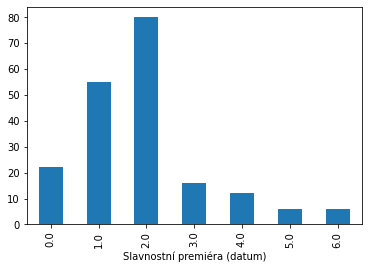

In [14]:
df[df["Slavnostní premiéra (datum)"] > "2013-04-12"].groupby(df['Slavnostní premiéra (datum)'].dt.weekday)["Film"].nunique().plot.bar()

<AxesSubplot:xlabel='Slavnostní premiéra (datum)'>

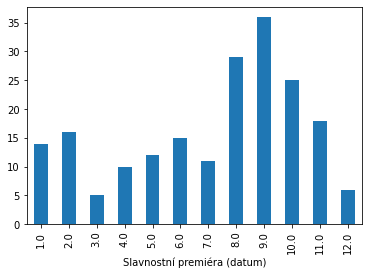

In [15]:
df[df["Slavnostní premiéra (datum)"] > "2013-04-12"].groupby(df['Slavnostní premiéra (datum)'].dt.month)["Film"].nunique().plot.bar()

In [16]:
df.groupby("Festivalová premiéra (místo)")["Film"].nunique().nlargest(50)

Festivalová premiéra (místo)
                                                                                          4293
53. mezinárodní filmový festival Karlovy Vary                                               13
13. festival českých a slovenských filmů Praha /kino Světozor, Praha/                       12
2. Filmové žně 1941 Zlín                                                                    10
1. Filmové žně 1940 Zlín                                                                     9
22. mezinárodní festival dokumentárních filmů Ji.hlava                                       8
26. mezinárodní filmový festival Febiofest Praha                                             8
54. mezinárodní filmový festival Karlovy Vary                                                6
23. mezinárodní festival dokumentárních filmů Ji.hlava                                       5
27. filmový festival pracujících – léto ´76                                                  4
3. přehlídka nekomerč

In [17]:
top_kina = df.groupby("Slavnostní premiéra (místo)")["Film"].nunique().nlargest(10).dropna().index.to_list()

In [18]:
top_kina = [x for x in top_kina if x != ""]

<AxesSubplot:xlabel='Copyright'>

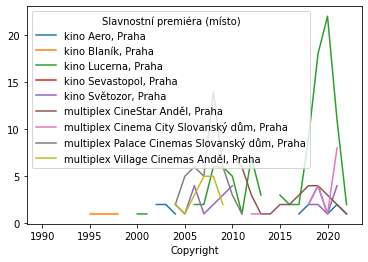

In [19]:
df[(df["Slavnostní premiéra (místo)"].isin(top_kina)) & (df["Copyright"] > 1989)].groupby(["Copyright","Slavnostní premiéra (místo)"])["Slavnostní premiéra (datum)"].nunique().unstack().plot()

In [20]:
df.groupby("Slavnostní premiéra (místo)")["Film"].nunique().nlargest()

Slavnostní premiéra (místo)
                                                 4004
kino Lucerna, Praha                               122
multiplex Palace Cinemas Slovanský dům, Praha      42
kino Světozor, Praha                               39
multiplex CineStar Anděl, Praha                    39
Name: Film, dtype: int64